In [1]:
import welly
from welly import Well
import pandas as pd
import numpy as np

/home/luis-cm/Documents/Github/pilot-ai-drill/.venv/lib/python3.12/site-packages/welly/__init__.py:69: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [2]:
# Load the LAS file into a Well object
well = Well.from_las('../../data/raw/Utah_Forge_16B(78)-32_6_19a.las')


In [3]:
# Get a general overview of the well
print(well)
print("\n--- Header Information ---")
well.header  # This is a DataFrame of the ~Well section:cite[2]


Well(uwi: '', name: 'Frontier_16-16B(78)-32(Frontier_16-16B(78)-32)', 37 curves: ['WOBI', 'TQI', 'RPMI', 'ROPA', 'ANH', 'CAL', 'CHL', 'EPI', 'HEM', 'PYR', 'QTZ', 'SER', 'SIL', 'LPT', 'MTIA', 'MTOA', 'AH2S3', 'AH2S4', 'AH2S2', 'AH2S1', 'UNKNOWN:1', 'UNKNOWN:2', 'UNKNOWN:3', 'UNKNOWN:4', 'UNKNOWN:5', 'UNKNOWN:6', 'UNKNOWN:7', 'UNKNOWN:8', 'UNKNOWN:9', 'UNKNOWN:10', 'UNKNOWN:11', 'UNKNOWN:12', 'UNKNOWN:13', 'UNKNOWN:14', 'UNKNOWN:15', 'UNKNOWN:16', 'UNKNOWN:17'])

--- Header Information ---


,original_mnemonic,mnemonic,unit,value,descr,section
0,VERS,VERS,,2.0,CWLS LOG ASCII STANDARD - VERSION 2.0,Version
1,WRAP,WRAP,,NO,ONE LINE PER DEPTH STEP,Version
2,STRT,STRT,ft,90.0,START DEPTH,Well
3,STOP,STOP,ft,10947.5,STOP DEPTH,Well
4,STEP,STEP,ft,1.0,STEP VALUE,Well
5,NULL,NULL,,-999.25,NULL VALUE,Well
6,COMP,COMP,,UTAH FORGE,COMPANY NAME,Well
7,WELL,WELL,,Frontier_16-16B(78)-32(Frontier_16-16B(78)-32),WELL NAME,Well
8,FLD,FLD,,FORGE,FIELD NAME,Well
9,LOC,LOC,,MILFORD,LOCATION,Well


In [4]:
# Define a remapping dictionary based on your LAS file's curve descriptions.
# Map standard Welly keys to the mnemonics in your file.
remap = {
    'DMEA': 'DEPT',  # Map the standard 'DEPT' key to your depth curve 'DMEA'
    'WOBI': 'WOB',
    'TQI': 'TORQUE',
    'RPMI': 'RPM',
    'ROPA': 'ROP'
}

# Reload the LAS file with the remapping applied
well = Well.from_las('../../data/raw/Utah_Forge_16B(78)-32_6_19a.las', remap=remap)
df_well = well.df()
df_well.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10857 entries, 90.0 to 10946.0
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WOBI        10041 non-null  float64
 1   TQI         9258 non-null   float64
 2   RPMI        10041 non-null  float64
 3   ROPA        10041 non-null  float64
 4   ANH         555 non-null    float64
 5   CAL         2840 non-null   float64
 6   CHL         1404 non-null   float64
 7   EPI         1063 non-null   float64
 8   HEM         1691 non-null   float64
 9   PYR         9 non-null      float64
 10  QTZ         9036 non-null   float64
 11  SER         28 non-null     float64
 12  SIL         0 non-null      float64
 13  LPT         10857 non-null  float64
 14  MTIA        10857 non-null  float64
 15  MTOA        10857 non-null  float64
 16  AH2S3       10857 non-null  float64
 17  AH2S4       10857 non-null  float64
 18  AH2S2       10857 non-null  float64
 19  AH2S1       10857 non-nul

/home/luis-cm/Documents/Github/pilot-ai-drill/.venv/lib/python3.12/site-packages/welly/curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:


In [5]:
df_well = df_well.iloc[:,:20]
df_well

,WOBI,TQI,RPMI,ROPA,ANH,CAL,CHL,EPI,HEM,PYR,QTZ,SER,SIL,LPT,MTIA,MTOA,AH2S3,AH2S4,AH2S2,AH2S1
DEPT,,,,,,,,,,,,,,,,,,,,
90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10942.0,55.03,20.5485,83.79,198.00,NaN,NaN,10.0,10.0,NaN,NaN,50.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10943.0,55.08,20.7034,82.75,194.51,NaN,NaN,10.0,10.0,NaN,NaN,50.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10944.0,55.26,20.8509,82.21,202.20,NaN,NaN,10.0,10.0,NaN,NaN,50.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_well = df_well.rename(columns={
    'DEPT': 'DEPTH',
    'WOBI': 'WOB',
    'TQI': 'TORQUE',
    'RPMI': 'RPM',
    'ROPA': 'ROP',
    'ANH':'ANHYDRITE',
    'CAL':'CALCITE',
    'CHL':'CHLORITE',
    'EPI':'EPIDOTE',
    'HEM':'HEMATITE',
    'PYR':'PYRITE',
    'QTZ':'QUARTZ',
    'SER':'SERICITE',
    'SIL':'SIL',
    'LPT':'LITOLOGY'
})
df_well

,WOB,TORQUE,RPM,ROP,ANHYDRITE,CALCITE,CHLORITE,EPIDOTE,HEMATITE,PYRITE,QUARTZ,SERICITE,SIL,LITOLOGY,MTIA,MTOA,AH2S3,AH2S4,AH2S2,AH2S1
DEPT,,,,,,,,,,,,,,,,,,,,
90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10942.0,55.03,20.5485,83.79,198.00,NaN,NaN,10.0,10.0,NaN,NaN,50.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10943.0,55.08,20.7034,82.75,194.51,NaN,NaN,10.0,10.0,NaN,NaN,50.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10944.0,55.26,20.8509,82.21,202.20,NaN,NaN,10.0,10.0,NaN,NaN,50.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_well.isnull().sum()

WOB            816
TORQUE        1599
RPM            816
ROP            816
ANHYDRITE    10302
CALCITE       8017
CHLORITE      9453
EPIDOTE       9794
HEMATITE      9166
PYRITE       10848
QUARTZ        1821
SERICITE     10829
SIL          10857
LITOLOGY         0
MTIA             0
MTOA             0
AH2S3            0
AH2S4            0
AH2S2            0
AH2S1            0
dtype: int64

/home/luis-cm/Documents/Github/pilot-ai-drill/.venv/lib/python3.12/site-packages/welly/curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:


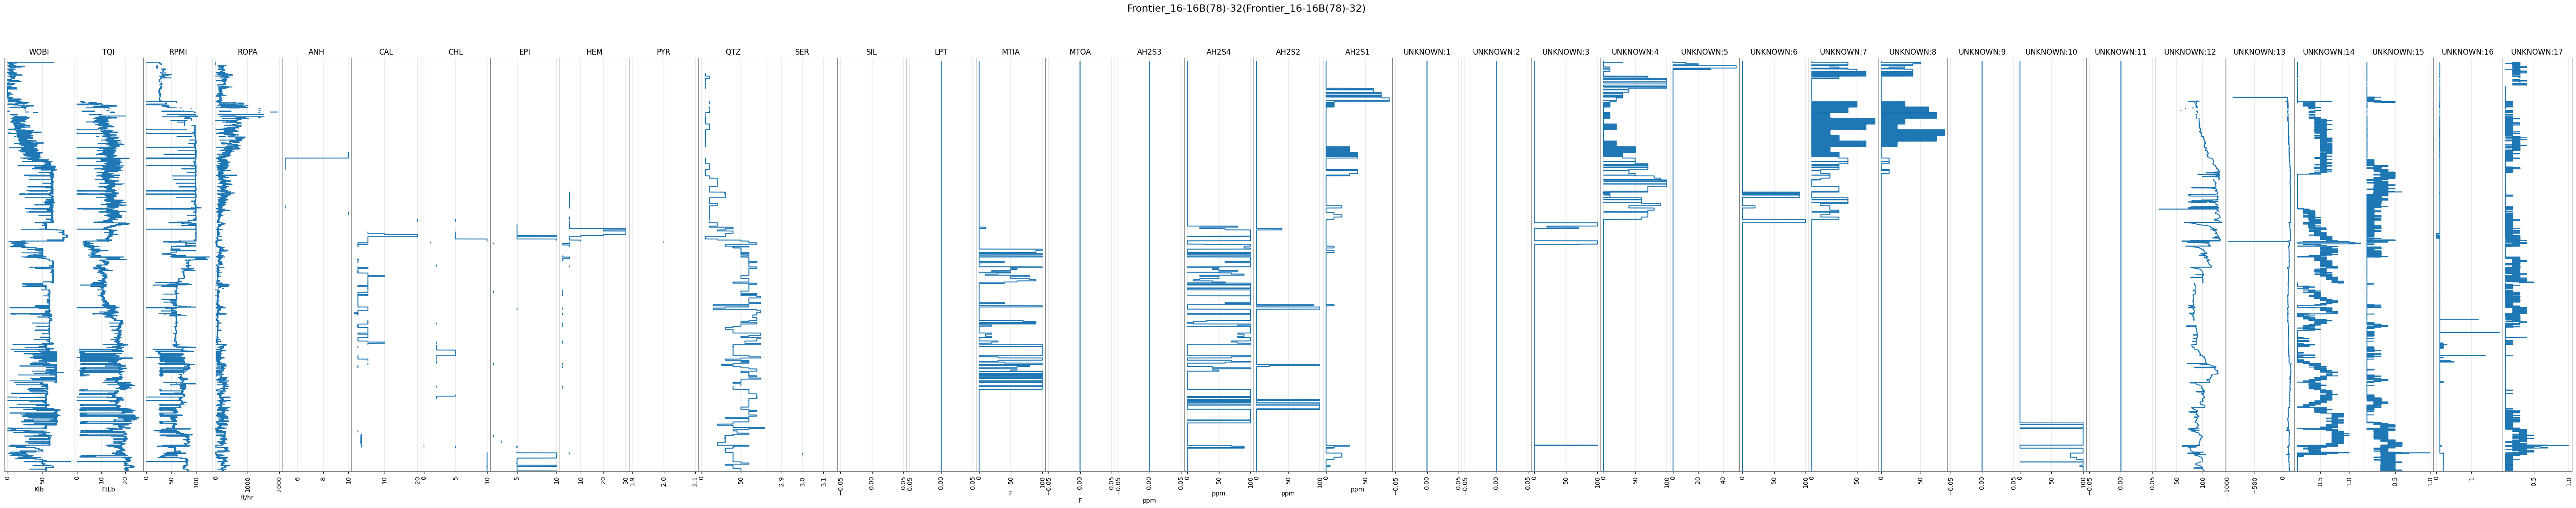

In [9]:
well.plot()

In [12]:
output_file = '../../data/processed/data.csv'
df_well = df_well.reset_index()
df_well.to_csv(output_file, index=False)